<a href="https://colab.research.google.com/github/marcintomala/CISC3142/blob/main/CISC3142_HW3_Verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import timeit
import dis

In [ ]:
# quick verification of C++ results using pandas:

# the three files:
a = pd.read_csv("1115.csv")
b = pd.read_csv("3115.csv")
c = pd.read_csv("3130.csv")
# combined into one dataframe:
frames = [a, b, c]
tot = pd.concat(frames)
tot.info()
tot.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5193 entries, 0 to 996
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   emplid        5193 non-null   object
 1   courseno      5193 non-null   int64 
 2   instructorid  5193 non-null   object
 3   termid        5193 non-null   object
 4   sectionid     5193 non-null   object
 5   grade         5193 non-null   object
dtypes: int64(1), object(5)
memory usage: 284.0+ KB


,emplid,courseno,instructorid,termid,sectionid,grade
0,E0003,1115,I12,T04,S10,B
1,E0118,1115,I12,T04,S10,B
2,E0174,1115,I12,T04,S10,W
3,E0188,1115,I12,T04,S10,B
4,E0212,1115,I12,T04,S10,A+


In [ ]:
tot.termid.unique()
spring_terms = ['T04', 'T07', 'T09', 'T12', 'T15', 'T17']
is_spring = [x in spring_terms for x in tot.termid]
tot['is_spring'] = is_spring

In [ ]:
# setting up some additional columns for easier analysis:
passing = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-", "CR", "P"]
# numeric values assume the lowest score required - not intended to be exact
grades = {'A+' : 97, 'A' : 93, 'A-' : 90, 'B+' : 87, 'B' : 83, 'B-' : 80, 'C+' : 77, 'C' : 73, 'C-' : 70, 'D+' : 67, 'D' : 63, 'D-' : 60, 'F' : 55}
withdrawing = ["W", "WN", "WD", "WU"]
failing = ["WU", "F", "FIN", "NC"]
passed = [x in passing for x in tot.grade]
withdrew = [x in withdrawing for x in tot.grade]
failing = [x in failing for x in tot.grade]
numeric = [grades[x] if x in grades.keys() else None for x in tot.grade]
tot['numeric'] = numeric
tot['passed'] = passed
tot['withdrew'] = withdrew
tot['failed'] = failing
tot.head()

,emplid,courseno,instructorid,termid,sectionid,grade,is_spring,numeric,passed,withdrew,failed
0,E0003,1115,I12,T04,S10,B,True,83.0,True,False,False
1,E0118,1115,I12,T04,S10,B,True,83.0,True,False,False
2,E0174,1115,I12,T04,S10,W,True,NaN,False,True,False
3,E0188,1115,I12,T04,S10,B,True,83.0,True,False,False
4,E0212,1115,I12,T04,S10,A+,True,97.0,True,False,False


In [ ]:
# pivot table 1 - pass rate by instructor
tot.pivot_table('passed', 'instructorid')

,passed
instructorid,
I01,0.618868
I02,0.553333
I03,0.900000
I04,0.420455
I06,0.826087
I07,0.928382
I08,0.470255
I10,0.877698
I11,0.612903


In [ ]:
# pivot table 2 - withdraw rate per instructor
tot.pivot_table('withdrew', 'instructorid')

,withdrew
instructorid,
I01,0.267925
I02,0.173333
I03,0.025000
I04,0.284091
I06,0.115942
I07,0.061008
I08,0.311615
I10,0.057554
I11,0.193548


In [ ]:
# pivot table 3 - pass rate by course number
tot.pivot_table('passed', 'courseno')

,passed
courseno,
1115,0.551440
3115,0.778906
3130,0.824473


In [ ]:
# pivot table 4 - withdraw rate by course number
tot.pivot_table('withdrew', 'courseno')

,withdrew
courseno,
1115,0.260631
3115,0.137500
3130,0.097292


In [ ]:
# pivot table 5 - pass rate by course by term
tot.pivot_table('passed', 'courseno', 'termid')

termid,T04,T05,T07,T08,T09,T11,T12,T13,T15,T16,T17,T19
courseno,,,,,,,,,,,,
1115,0.551839,0.506173,0.439024,0.596610,0.542029,0.477273,0.554878,0.623978,0.632653,0.563636,0.491228,0.550000
3115,NaN,0.757396,NaN,0.723926,0.752941,0.931034,0.731429,0.865497,0.933333,0.771429,0.771429,0.956522
3130,NaN,NaN,0.892857,0.815789,0.800000,0.764706,0.858974,0.909091,0.714286,0.779874,0.808917,0.800000


In [ ]:
# pivot table 6 - withdraw rate by course by term
tot.pivot_table('withdrew', 'courseno', 'termid')

termid,T04,T05,T07,T08,T09,T11,T12,T13,T15,T16,T17,T19
courseno,,,,,,,,,,,,
1115,0.254181,0.305556,0.243902,0.216949,0.223188,0.227273,0.253049,0.201635,0.285714,0.238961,0.368421,0.350000
3115,NaN,0.171598,NaN,0.128834,0.141176,0.000000,0.200000,0.046784,0.033333,0.160000,0.165714,0.043478
3130,NaN,NaN,0.071429,0.096491,0.037037,0.088235,0.057692,0.071429,0.114286,0.169811,0.140127,0.120000


In [ ]:
# mean final grade by instructor
aaa = tot.pivot_table('numeric', 'instructorid', aggfunc='mean')
bbb = tot.pivot_table('passed', 'instructorid')
ccc = tot.pivot_table('withdrew', 'instructorid')

instructor = pd.DataFrame()
instructor.index = aaa.index
instructor.head()
instructor['numeric'] = aaa.numeric
instructor['passed'] = bbb.passed
instructor['withdrew'] = ccc.withdrew
instructor.head()

,numeric,passed,withdrew
instructorid,,,
I01,78.078125,0.618868,0.267925
I02,72.575221,0.553333,0.173333
I03,86.540541,0.900000,0.025000
I04,70.440000,0.420455,0.284091
I06,79.459016,0.826087,0.115942


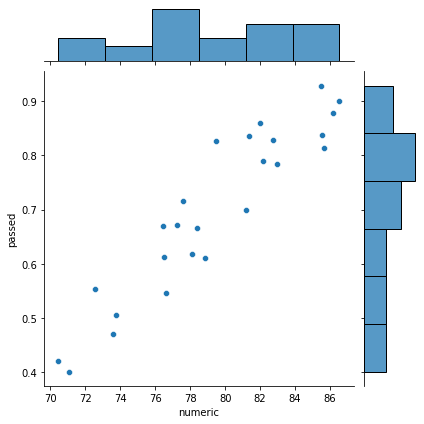

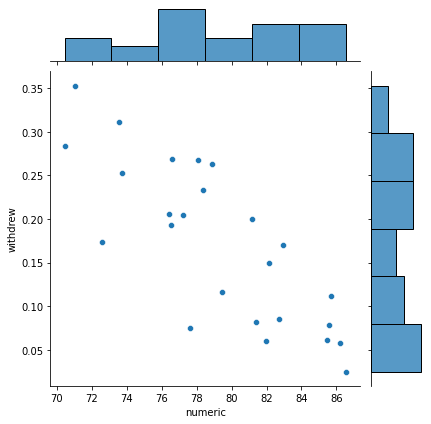

In [ ]:
stats.pearsonr(instructor.numeric, instructor.passed)
stats.pearsonr(instructor.numeric, instructor.withdrew)
sns.jointplot(data=instructor, x='numeric', y='passed')
sns.jointplot(data=instructor, x='numeric', y='withdrew')

Unsurprisingly, numerical grades are positvely correlated with pass rates and negatively with withdrawal rates. 


In [ ]:
tot.pivot_table('passed', 'is_spring')

,passed
is_spring,
False,0.677649
True,0.641158


In [ ]:
tot.pivot_table('withdrew', 'is_spring')

,withdrew
is_spring,
False,0.185324
True,0.213323


In [ ]:
tot.pivot_table('passed', 'is_spring', 'courseno')

courseno,1115,3115,3130
is_spring,,,
False,0.569759,0.791781,0.829218
True,0.533196,0.761818,0.819961


In [ ]:
tot.pivot_table('withdrew', 'is_spring', 'courseno')

courseno,1115,3115,3130
is_spring,,,
False,0.242612,0.119178,0.113169
True,0.278576,0.161818,0.082192
